In [98]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [99]:
migration = pd.read_csv("data/international_migration.csv",sep=";",decimal=",").replace("x",0).rename(columns={"Unnamed: 0":"year"}).set_index("year").astype(int)

In [100]:
migration["young"] = migration['0 t/m 4 jaar'] + migration['5 t/m 9 jaar'] + migration['10 t/m 14 jaar'] + migration['15 t/m 19 jaar']
migration["middle"] = migration['20 t/m 24 jaar'] + migration['25 t/m 29 jaar'] + migration['30 t/m 34 jaar'] + migration['35 t/m 39 jaar'] + migration['40 t/m 44 jaar'] + migration['45 t/m 49 jaar'] + migration['50 t/m 54 jaar'] + migration['55 t/m 59 jaar'] + migration['60 t/m 64 jaar']
migration["old"] = migration['65 t/m 69 jaar'] + migration['70 t/m 74 jaar'] + migration['75 t/m 79 jaar'] + migration['80 t/m 84 jaar'] + migration['85 t/m 89 jaar'] + migration['90 t/m 94 jaar'] + migration['95 jaar en ouder']

In [101]:
migration = migration.drop(columns=['0 t/m 4 jaar', '5 t/m 9 jaar', '10 t/m 14 jaar',
       '15 t/m 19 jaar', '20 t/m 24 jaar', '25 t/m 29 jaar', '30 t/m 34 jaar',
       '35 t/m 39 jaar', '40 t/m 44 jaar', '45 t/m 49 jaar', '50 t/m 54 jaar',
       '55 t/m 59 jaar', '60 t/m 64 jaar', '65 t/m 69 jaar', '70 t/m 74 jaar',
       '75 t/m 79 jaar', '80 t/m 84 jaar', '85 t/m 89 jaar', '90 t/m 94 jaar',
       '95 jaar en ouder']).rename(columns={'Nederlands':'dutch', 'Marokkanen':'morocco', 'Turken':'turkey', 'Surinamers':'suriname', 'Antillianen':'antilles',
       'Oost-Europeanen':'eastern_eu', 'Indonesiërs':'indonesian', 'Overig Westers':'other_western',
       'Overig niet-Westers':'other_nonwestern'})

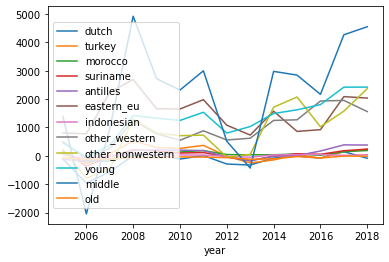

In [102]:
migration.plot()

In [103]:
migration["tot_eth"] = migration["dutch"] + migration["morocco"] + migration["turkey"] + migration["suriname"] + migration["antilles"] + migration["eastern_eu"] + migration["indonesian"] + migration["other_western"] + migration["other_nonwestern"]
migration["tot_age"] = migration["young"] + migration["middle"] + migration["old"]

In [104]:
#judging by the data, 2018 has not recorded all of its migrations yet. We take the last reliable datapoint (2017)
#and the last reliable change (2017-2016), then take a very simple linear regression approach to get to the numbers of 2020.
migration.loc[2020] = migration.loc[2017] + 2 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2021] = migration.loc[2017] + 2.5 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2022] = migration.loc[2017] + 3 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2023] = migration.loc[2017] + 4 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2024] = migration.loc[2017] + 4.5 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2025] = migration.loc[2017] + 5 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2026] = migration.loc[2017] + 6 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2027] = migration.loc[2017] + 6.5 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2028] = migration.loc[2017] + 7 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2029] = migration.loc[2017] + 8 * (migration.loc[2017] - migration.loc[2016])
migration.loc[2030] = migration.loc[2017] + 8.5 * (migration.loc[2017] - migration.loc[2016])

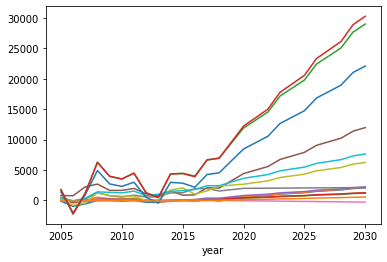

In [105]:
#seems probable
migration.plot(legend=False)

In [111]:
#I don't want to observe negative growth, and the outflux is so small it is neglegable
migration["indonesian"] = 0
#rerun the statistics because of this
migration["tot_eth"] = migration["dutch"] + migration["morocco"] + migration["turkey"] + migration["suriname"] + migration["antilles"] + migration["eastern_eu"] + migration["indonesian"] + migration["other_western"] + migration["other_nonwestern"]

In [113]:
migration.loc[2020:2030].to_csv("output/migration.csv")

In [112]:
migration.loc[2020:2030]

,dutch,turkey,morocco,suriname,antilles,eastern_eu,indonesian,other_western,other_nonwestern,young,middle,old,tot_eth,tot_age
year,,,,,,,,,,,,,,
2020,602.0,629.0,394.0,435.0,818.0,4414.0,0,1992.0,2674.0,3645.0,8460.0,126.0,11958.0,12231.0
2021,715.5,747.5,456.0,498.5,926.0,4996.0,0,2002.0,2949.0,3951.5,9509.0,159.5,13290.5,13620.0
2022,829.0,866.0,518.0,562.0,1034.0,5578.0,0,2012.0,3224.0,4258.0,10558.0,193.0,14623.0,15009.0
2023,1056.0,1103.0,642.0,689.0,1250.0,6742.0,0,2032.0,3774.0,4871.0,12656.0,260.0,17288.0,17787.0
2024,1169.5,1221.5,704.0,752.5,1358.0,7324.0,0,2042.0,4049.0,5177.5,13705.0,293.5,18620.5,19176.0
2025,1283.0,1340.0,766.0,816.0,1466.0,7906.0,0,2052.0,4324.0,5484.0,14754.0,327.0,19953.0,20565.0
2026,1510.0,1577.0,890.0,943.0,1682.0,9070.0,0,2072.0,4874.0,6097.0,16852.0,394.0,22618.0,23343.0
2027,1623.5,1695.5,952.0,1006.5,1790.0,9652.0,0,2082.0,5149.0,6403.5,17901.0,427.5,23950.5,24732.0
2028,1737.0,1814.0,1014.0,1070.0,1898.0,10234.0,0,2092.0,5424.0,6710.0,18950.0,461.0,25283.0,26121.0
